In [1]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
!pip install -U spacy

     |████████████████████████████████| 30.8MB 20kB/s  eta 0:00:01                | 1.5MB 2.4MB/s eta 0:00:13     |███▊                            | 3.6MB 2.4MB/s eta 0:00:12     |████                            | 3.9MB 2.4MB/s eta 0:00:125.9MB 2.4MB/s eta 0:00:11�███████████▍               | 15.8MB 6.2MB/s eta 0:00:03     |███████████████████████▌        | 22.6MB 398kB/s eta 0:00:21
     |████████████████████████████████| 184kB 8.0MB/s eta 0:00:01
     |████████████████████████████████| 2.1MB 16.6MB/s eta 0:00:01     |██████████████████████████████▋ | 2.0MB 16.6MB/s eta 0:00:01
     |████████████████████████████████| 92kB 14.4MB/s eta 0:00:01
     |████████████████████████████████| 3.2MB 26.4MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!pip install -U gensim

     |████████████████████████████████| 24.2MB 31kB/s  eta 0:00:01████▌                       | 6.5MB 2.8MB/s eta 0:00:07                | 7.3MB 2.8MB/s eta 0:00:07��████████████████████▋   | 21.6MB 2.1MB/s eta 0:00:02
     |████████████████████████████████| 71kB 3.5MB/s  eta 0:00:01
  Created wheel for smart-open: filename=smart_open-1.8.4-cp35-none-any.whl size=73429 sha256=aa190143306adea9129e6bcdd1b9925c951c9f645c2daab6c7334800437e9121
  Stored in directory: /home/nbuser/.cache/pip/wheels/5f/ea/fb/5b1a947b369724063b2617011f1540c44eb00e28c3d2ca8692
Successfully built smart-open
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
!pip install -U pyLDAvis

     |████████████████████████████████| 1.6MB 3.4MB/s eta 0:00:01
     |████████████████████████████████| 286kB 25.4MB/s eta 0:00:01
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=100200 sha256=1e4487f266d5498a71b1270e43e2365cec7b7e7406bfa88d9d36690a32d8d8fe
  Stored in directory: /home/nbuser/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_json('abstract.json', lines=True)
df.head()

,abstract
0,"The rapid increasing of online information is hard to handle.Summaries such as abstracts help us to reduce this problem. Keywords, whichcan be regarded as very short summaries, may help even more...."
1,Keywords are very important for any academic paper. We propose the Perceptron Training Rule for keyword extraction from titles and abstracts. We present a system for generating keywords which reli...
2,"Paper presents a survey of methods and approaches for keyword extraction task. In addition to the systematization of methods, the paper gathers a comprehensive review of existing research. Related..."
3,"Every year thousands of academic studies are published all over the world. When researchers search for a topic, they quickly look at abstracts and keywords. In many academic disciplines, the autho..."
4,"We describe latent Dirichlet allocation (LDA), a generative probabilistic model for collections of discrete data such as text corpora. LDA is a three-level hierarchical Bayesian model, in which ea..."


In [8]:
# function to plot most frequent terms
def freq_words(x, terms = 35):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  print(list(fdist.keys()))
  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

['comprehensive', 'research', 'keyword', 'work', 'complex', 'future', 'candidates.', 'paper', 'graphbased', 'Paper', 'The', 'presents', 'survey', 'network', 'existing', 'extraction', 'and', 'approaches', 'addition', 'provides', 'Croatian', 'Related', 'a', 'on', 'from', 'emphasis', 'is', 'elaborated', 'systematization', 'review', 'guidelines', 'gathers', 'task.', 'research.', 'nodes', 'which', 'unsupervised', 'Selectivity-based', 'extracts', 'as', 'to', 'of', 'for', 'methods', 'supervised', 'new', 'extraction.', 'special', 'methods,', 'development', 'the', 'with', 'In', 'well', 'graph-based', 'proposed', 'method']


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


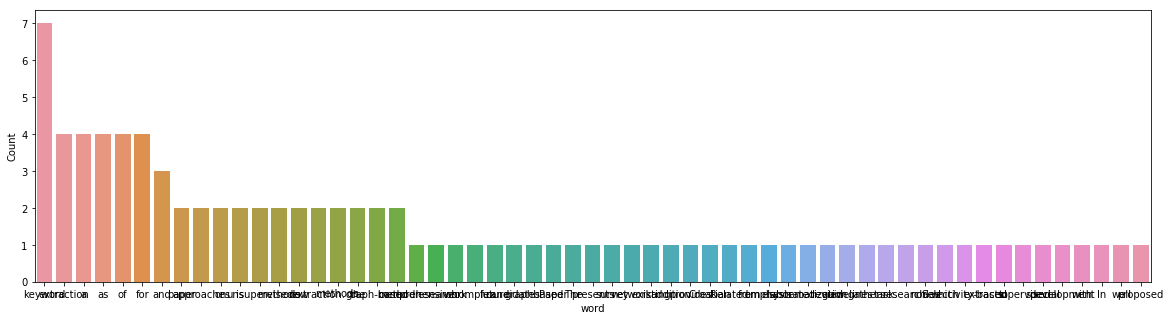

In [11]:
freq_words(df.iloc[2])

In [12]:
# remove unwanted characters, numbers and symbols
df.iloc[2] = df.iloc[2].str.replace("[^a-zA-Z#]", " ")
df.iloc[2]

abstract    Paper presents a survey of methods and approaches for keyword extraction task  In addition to the systematization of methods  the paper gathers a comprehensive review of existing research  Related...
Name: 2, dtype: object

In [13]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [16]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df.iloc[2]]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

['guidelines', 'comprehensive', 'gathers', 'research', 'croatian', 'keyword', 'task', 'related', 'complex', 'emphasis', 'nodes', 'candidates', 'provides', 'unsupervised', 'paper', 'method', 'development', 'graphbased', 'future', 'graph', 'survey', 'network', 'existing', 'methods', 'supervised', 'new', 'extracts', 'addition', 'in', 'special', 'presents', 'extraction', 'approaches', 'proposed', 'the', 'work', 'elaborated', 'selectivity', 'systematization', 'review', 'based', 'well']


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


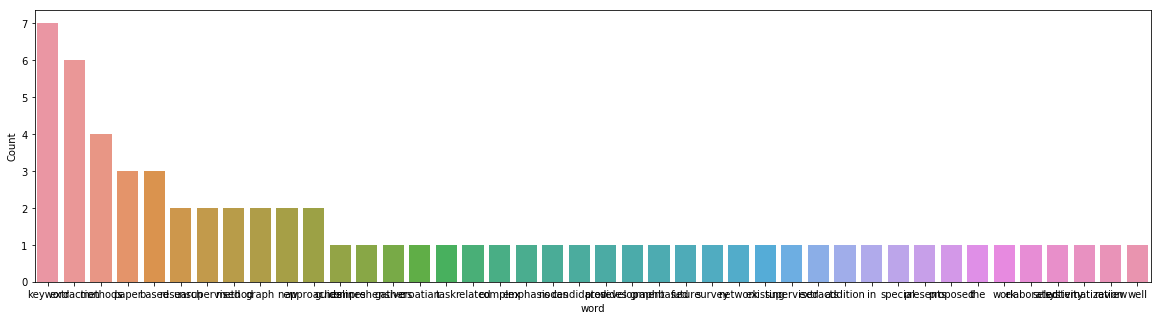

In [17]:
freq_words(reviews, 35)

In [18]:
!python -m spacy download en # one time run

You should consider upgrading via the 'pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/en_core_web_sm -->
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [19]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [20]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[0])

['paper', 'presents', 'survey', 'methods', 'approaches', 'keyword', 'extraction', 'task', 'in', 'addition', 'systematization', 'methods', 'paper', 'gathers', 'comprehensive', 'review', 'existing', 'research', 'related', 'work', 'keyword', 'extraction', 'elaborated', 'supervised', 'unsupervised', 'methods', 'special', 'emphasis', 'graphbased', 'methods', 'well', 'croatian', 'keyword', 'extraction', 'selectivity', 'based', 'keyword', 'extraction', 'method', 'proposed', 'new', 'unsupervised', 'graph', 'based', 'keyword', 'extraction', 'method', 'extracts', 'nodes', 'complex', 'network', 'keyword', 'candidates', 'the', 'paper', 'provides', 'guidelines', 'future', 'research', 'development', 'new', 'graph', 'based', 'approaches', 'keyword', 'extraction']


In [21]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[0]) # print lemmatized review

['paper', 'method', 'keyword', 'extraction', 'task', 'addition', 'systematization', 'method', 'paper', 'comprehensive', 'review', 'research', 'work', 'keyword', 'extraction', 'unsupervised', 'method', 'special', 'emphasis', 'method', 'croatian', 'keyword', 'extraction', 'selectivity', 'keyword', 'extraction', 'method', 'new', 'unsupervised', 'graph', 'keyword', 'extraction', 'method', 'extract', 'node', 'complex', 'network', 'keyword', 'paper', 'guideline', 'future', 'research', 'development', 'new', 'graph', 'keyword', 'extraction']


In [22]:
reviews_2

[['paper',
  'method',
  'keyword',
  'extraction',
  'task',
  'addition',
  'systematization',
  'method',
  'paper',
  'comprehensive',
  'review',
  'research',
  'work',
  'keyword',
  'extraction',
  'unsupervised',
  'method',
  'special',
  'emphasis',
  'method',
  'croatian',
  'keyword',
  'extraction',
  'selectivity',
  'keyword',
  'extraction',
  'method',
  'new',
  'unsupervised',
  'graph',
  'keyword',
  'extraction',
  'method',
  'extract',
  'node',
  'complex',
  'network',
  'keyword',
  'paper',
  'guideline',
  'future',
  'research',
  'development',
  'new',
  'graph',
  'keyword',
  'extraction']]

['unsupervised', 'development', 'comprehensive', 'research', 'keyword', 'task', 'work', 'croatian', 'node', 'complex', 'future', 'guideline', 'network', 'extract', 'new', 'addition', 'special', 'graph', 'extraction', 'paper', 'emphasis', 'selectivity', 'systematization', 'review', 'method']


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


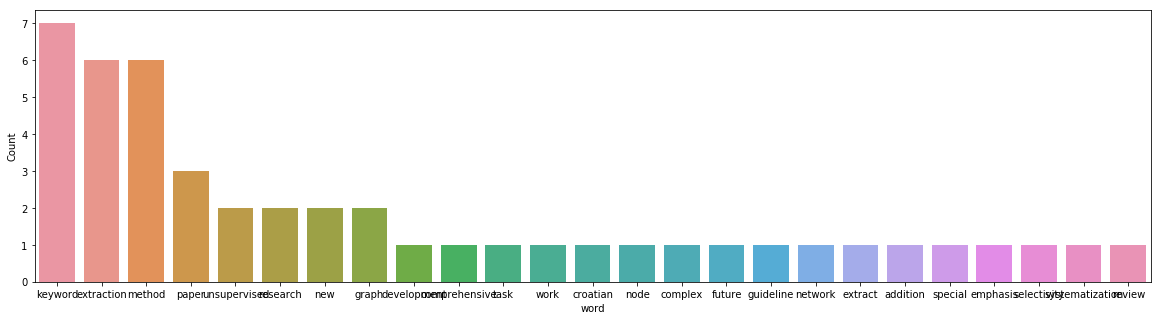

In [23]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

text = reviews_3

freq_words(text, 35)

In [24]:
dictionary = corpora.Dictionary(reviews_2)

In [25]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [27]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=2, random_state=100,
                chunksize=1000, passes=50)

In [28]:
lda_model.print_topics()

[(0,
  '0.040*"keyword" + 0.040*"method" + 0.040*"extraction" + 0.040*"paper" + 0.040*"unsupervised" + 0.040*"new" + 0.040*"graph" + 0.040*"research" + 0.040*"network" + 0.040*"selectivity"'),
 (1,
  '0.126*"keyword" + 0.109*"extraction" + 0.109*"method" + 0.059*"paper" + 0.042*"graph" + 0.042*"new" + 0.042*"unsupervised" + 0.042*"research" + 0.025*"comprehensive" + 0.025*"task"')]

In [29]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x    y
topic                                           
1      98.815014        1       1  0.021908  0.0
0       1.184986        1       2 -0.021908  0.0, topic_info=     Category      Freq             Term     Total  loglift  logprob
term                                                                
24    Default  5.000000           method  5.000000  25.0000  25.0000
18    Default  5.000000       extraction  5.000000  24.0000  24.0000
19    Default  2.000000            paper  2.000000  23.0000  23.0000
4     Default  5.000000          keyword  5.000000  22.0000  22.0000
14    Default  1.000000              new  1.000000  21.0000  21.0000
17    Default  1.000000            graph  1.000000  20.0000  20.0000
0     Default  1.000000     unsupervised  1.000000  19.0000  19.0000
3     Default  1.000000         research  1.000000  18.0000  18.0000
12    Default  1.000000          network  1.000000  17.0000  17.0000
6     Default  1.000000             work  1.000000  16.0000  16.0000
21    Default  1.000000      selectivity  1.000000  15.0000  15.0000
16    Default  1.000000         croatian  1.000000  14.0000  14.0000
10    Default  1.000000           future  1.000000  13.0000  13.0000
1     Default  1.000000      development  1.000000  12.0000  12.0000
9     Default  1.000000          complex  1.000000  11.0000  11.0000
15    Default  1.000000         addition  1.000000  10.0000  10.0000
20    Default  1.000000         emphasis  1.000000   9.0000   9.0000
23    Default  1.000000           review  1.000000   8.0000   8.0000
7     Default  1.000000          special  1.000000   7.0000   7.0000
13    Default  1.000000          extract  1.000000   6.0000   6.0000
8     Default  1.000000             node  1.000000   5.0000   5.0000
11    Default  1.000000        guideline  1.000000   4.0000   4.0000
5     Default  1.000000             task  1.000000   3.0000   3.0000
2     Default  1.000000    comprehensive  1.000000   2.0000   2.0000
22    Default  1.000000  systematization  1.000000   1.0000   1.0000
4      Topic1  5.858728          keyword  5.881009   0.0081  -2.0703
18     Topic1  5.077271       extraction  5.099552   0.0075  -2.2135
24     Topic1  5.077270           method  5.099551   0.0075  -2.2135
19     Topic1  2.732906            paper  2.755186   0.0038  -2.8329
3      Topic1  1.951461         research  1.973740   0.0006  -3.1696
...       ...       ...              ...       ...      ...      ...
10     Topic1  1.170061           future  1.192337  -0.0069  -3.6812
9      Topic1  1.170061          complex  1.192338  -0.0069  -3.6812
21     Topic1  1.170061      selectivity  1.192338  -0.0069  -3.6812
6      Topic1  1.170061             work  1.192338  -0.0069  -3.6812
12     Topic1  1.170061          network  1.192337  -0.0069  -3.6812
12     Topic2  0.022277          network  1.192337   0.4553  -3.2189
6      Topic2  0.022277             work  1.192338   0.4553  -3.2189
21     Topic2  0.022277      selectivity  1.192338   0.4553  -3.2189
9      Topic2  0.022276          complex  1.192338   0.4553  -3.2189
10     Topic2  0.022276           future  1.192337   0.4553  -3.2189
16     Topic2  0.022276         croatian  1.192337   0.4553  -3.2189
1      Topic2  0.022276      development  1.192338   0.4553  -3.2189
7      Topic2  0.022276          special  1.192338   0.4553  -3.2189
15     Topic2  0.022276         addition  1.192338   0.4553  -3.2189
23     Topic2  0.022276           review  1.192338   0.4553  -3.2189
20     Topic2  0.022276         emphasis  1.192338   0.4553  -3.2189
2      Topic2  0.022276    comprehensive  1.192338   0.4553  -3.2189
5      Topic2  0.022276             task  1.192338   0.4553  -3.2189
11     Topic2  0.022276        guideline  1.192338   0.4553  -3.2189
13     Topic2  0.022276          extract  1.192338   0.4553  -3.2189
8      Topic2  0.022276             node  1.192338   0.4553  -3.2189
22     Topic2  0.022276  systematiz

In [30]:
print("\nPerplexity",lda_model.log_perplexity(doc_term_matrix))


Perplexity -3.433271943254674


In [31]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model,texts=reviews_2,dictionary=dictionary,coherence='c_v')

In [32]:
coherence_lda=coherence_model_lda.get_coherence()
print("\nCoherence:",coherence_lda)


Coherence: 0.9999999999999998


In [33]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LDA(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [34]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=reviews_2, start=2, limit=15, step=6)

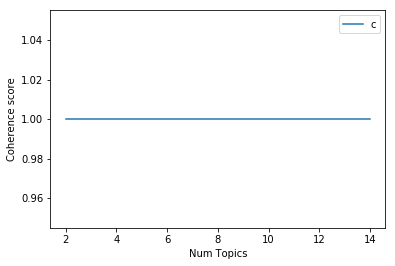

In [35]:
# Show graph
limit=15; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()